# Simulation experiments

This notebook follows the examples in `model_examples.ipynb`.

In [1]:
import numpy as np
from py.model import *
# from py.simulation import stochastic_update, deterministic_update
from SpringRank import SpringRank
from matplotlib import pyplot as plt

[[0.01350191 0.01350191 0.07974605 0.01350191 0.07974821]
 [0.01350191 0.01350191 0.07974605 0.01350191 0.07974821]
 [0.01350191 0.01350191 0.07974605 0.01350191 0.07974821]
 [0.01350191 0.01350191 0.07974605 0.01350191 0.07974821]
 [0.01350191 0.01350191 0.07974605 0.01350191 0.07974821]]
gamma  : [0.06750956 0.06750956 0.3987305  0.06750956 0.39874082]  sum: 0.9999999999999998
scores : [-0.28416471 -0.28416471  0.42624189 -0.28416471  0.42625225]  sum : 1.965094753586527e-14

[[0.01350191 0.01350191 0.07973665 0.01350191 0.07975761]
 [0.01350191 0.01350191 0.07973665 0.01350191 0.07975761]
 [0.01350191 0.01350191 0.07973665 0.01350191 0.07975761]
 [0.01350191 0.01350191 0.07973665 0.01350191 0.07975761]
 [0.01350191 0.01350191 0.07973665 0.01350191 0.07975761]]
gamma  : [0.06750957 0.06750957 0.3986856  0.06750957 0.3987857 ]  sum: 1.0
scores : [-0.28416469 -0.28416469  0.42619683 -0.28416469  0.42629725]  sum : 1.8984813721090177e-14

[[0.07974033 0.01350191 0.01350191 0.07975393 0.

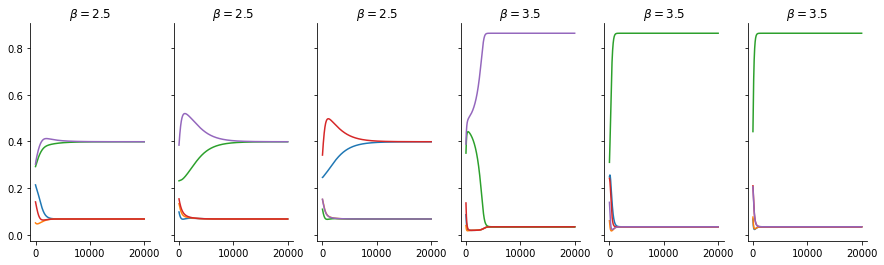

In [22]:
# do a few experiments
# print A, GAMMA, and S at the last time step

# parameters for the fig

m_plots = 6
BETAS = [2.5,2.5,2.5,3.5,3.5,3.5] # np.linspace(1, 3, m_plots)
methods = [deterministic_update, stochastic_update]

n_rounds = 20000
lam = .99

n = 5

# initial condition

# A0 = np.random.rand(n,n)
# A0 = A0 / A0.sum()

# initialize the model

M = model()
M.set_score(
    score_function = lambda A: SpringRank.SpringRank(A.T, alpha = 10**(-15))
)
linear_feature = lambda s: np.tile(s, (len(s),1))
M.set_features([linear_feature])

# create fig

fig, axarr = plt.subplots(len(methods)-1, m_plots, figsize = (15, 4), squeeze = False, sharey = True)

# loop through axs, doing a simulation for each and plotting. 

for k in range(len(methods)):
    for i in range(m_plots):
        
        # initial condition
        A0 = np.random.rand(n,n)
        A0 = A0 / A0.sum()
        
        T = M.simulate(lam = lam,
                       beta = np.array([BETAS[i]]), 
                       A0 = A0, 
                       n_rounds = n_rounds, 
                       update = methods[k], 
                       m_updates = 1)
        GAMMA = M.get_rates()
        A     = M.get_states()
        S     = M.get_scores()
        
        # for deterministic sims, print the last timestep
        if methods[k] == deterministic_update:
            print(A[-1])
            print("gamma  :",GAMMA.mean(axis = 1)[-1,]," sum:",np.sum(GAMMA.mean(axis = 1)[-1,]))
            print("scores :",S[-1,]," sum :",np.sum(S[-1,]))
            print("")
        
        # plot only the deterministic sims
        if methods[k] == deterministic_update:
            axarr[k][i].plot(GAMMA.mean(axis = 1))

            axarr[k][i].spines['right'].set_visible(False)
            axarr[k][i].spines['top'].set_visible(False)

            axarr[k][i].set_title(r'$\beta = $' + str(BETAS[i]))